# Q6

In [192]:
# library imports
import sys, math, os
import numpy as np
from numpy import abs, log, rot90, hstack, fft, copy, vstack
from numpy.fft import fftshift, fft2
from skimage import io, util, color, data, filters, img_as_ubyte, transform, img_as_float, exposure
from skimage.color import rgb2lab, rgb2hsv, hsv2rgb, lab2rgb, rgb2gray
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
from scipy.ndimage import filters, sobel
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte
from collections import defaultdict
from scipy import misc

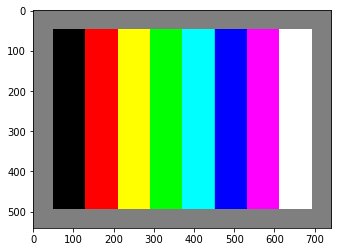

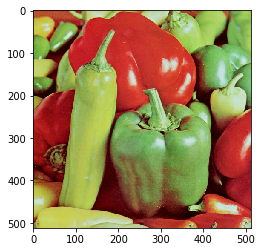

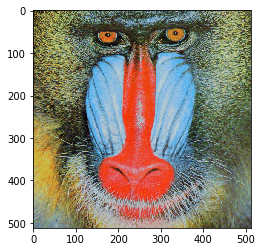

In [185]:
im1 = imread('./images/color_bars.tif')
im3 = imread('./images/mandril_color.tif')
im2 = imread('./images/PeppersR.tiff')[:,:,0:3]

plt.figure()
plt.imshow(im1)
plt.figure()
plt.imshow(im2)
plt.figure()
plt.imshow(im3)

### Part 1

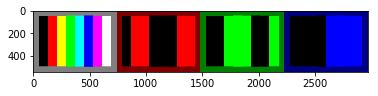

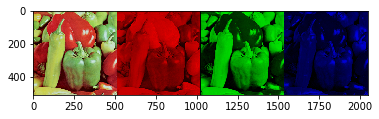

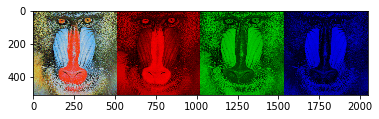

In [186]:
# RGB Model
def get_channel(im):
    im_r = copy(im)
    im_r[:,:,1:3] = 0
    im_g = copy(im)
    im_g[:,:,0] = 0
    im_g[:,:,2] = 0
    im_b = copy(im)
    im_b[:,:,0:2] = 0
    return im_r, im_g, im_b

im1_r, im1_g, im1_b = get_channel(im1)
res1 = hstack((im1, im1_r))
res1 = hstack((res1, im1_g))
res1 = hstack((res1, im1_b))
plt.figure()
plt.imshow(res1)

im2_r, im2_g, im2_b = get_channel(im2)
res2 = hstack((im2, im2_r))
res2 = hstack((res2, im2_g))
res2 = hstack((res2, im2_b))
plt.figure()
plt.imshow(res2)

im3_r, im3_g, im3_b = get_channel(im3)
res3 = hstack((im3, im3_r))
res3 = hstack((res3, im3_g))
res3 = hstack((res3, im3_b))
plt.figure()
plt.imshow(res3)

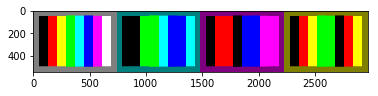

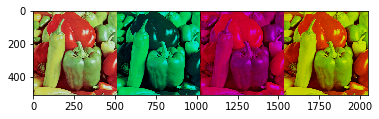

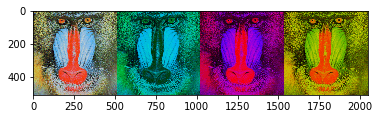

In [187]:
# CMY Model
def get_comp_channel(im):
    im_c = copy(im)
    im_c[:,:,0] = 0
    im_m = copy(im)
    im_m[:,:,1] = 0
    im_y = copy(im)
    im_y[:,:,2] = 0
    return im_c, im_m, im_y

im1_c, im1_m, im1_y = get_comp_channel(im1)
res1_cmy = hstack((im1, im1_c))
res1_cmy = hstack((res1_cmy, im1_m))
res1_cmy = hstack((res1_cmy, im1_y))
plt.figure()
plt.imshow(res1_cmy)

im2_c, im2_m, im2_y = get_comp_channel(im2)
res2_cmy = hstack((im2, im2_c))
res2_cmy = hstack((res2_cmy, im2_m))
res2_cmy = hstack((res2_cmy, im2_y))
plt.figure()
plt.imshow(res2_cmy)

im3_c, im3_m, im3_y = get_comp_channel(im3)
res3_cmy = hstack((im3, im3_c))
res3_cmy = hstack((res3_cmy, im3_m))
res3_cmy = hstack((res3_cmy, im3_y))
plt.figure()
plt.imshow(res3_cmy)

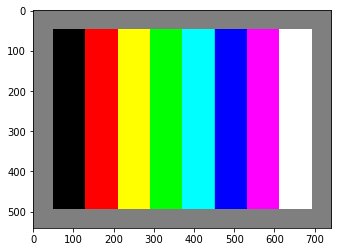

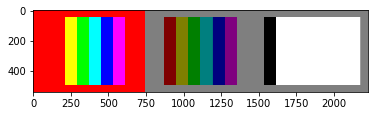

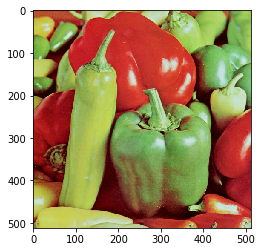

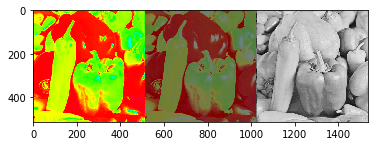

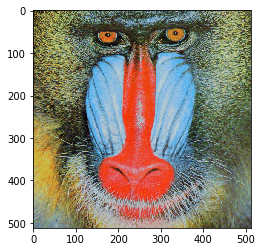

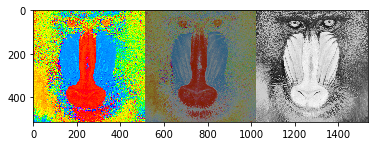

In [216]:
# HSI/HSV Model
# 1: Hue space with full saturation: 1.0, full value: 255
# 2: Saturation representation: 0 values
# 3: Value space with 0 saturation of hues
def get_hsv_channel(im):
    im_hsv1 = rgb2hsv(im)
    im_hsv1[:,:,1:3] = 1.0
    im_h = hsv2rgb(im_hsv1)
    ##########################
    im_hsv2 = rgb2hsv(im)
    im_hsv2[:,:,2] = 0.5
    im_s = hsv2rgb(im_hsv2)
    ##########################
    im_hsv3 = rgb2hsv(im)
    im_hsv3[:,:,1] = 0.0
    im_v = hsv2rgb(im_hsv3)
    ##########################
    return im_h, im_s, im_v

im1_h, im1_s, im1_v = get_hsv_channel(im1)
plt.figure()
plt.imshow(im1)
res1_hsv = hstack((im1_h, im1_s))
res1_hsv = hstack((res1_hsv, im1_v))
plt.figure()
plt.imshow(res1_hsv)

im2_h, im2_s, im2_v = get_hsv_channel(im2)
plt.figure()
plt.imshow(im2)
res2_hsv = hstack((im2_h, im2_s))
res2_hsv = hstack((res2_hsv, im2_v))
plt.figure()
plt.imshow(res2_hsv)

im3_h, im3_s, im3_v = get_hsv_channel(im3)
plt.figure()
plt.imshow(im3)
res3_hsv = hstack((im3_h, im3_s))
res3_hsv = hstack((res3_hsv, im3_v))
plt.figure()
plt.imshow(res3_hsv)

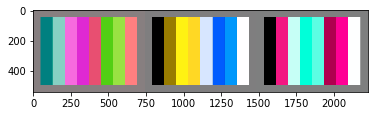

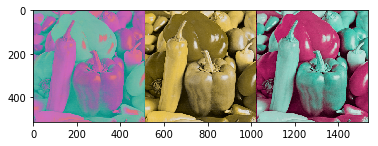

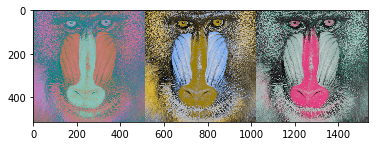

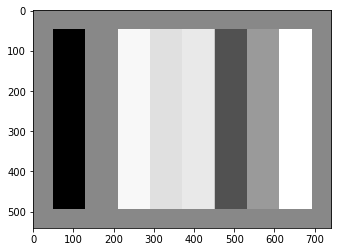

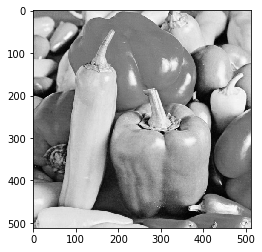

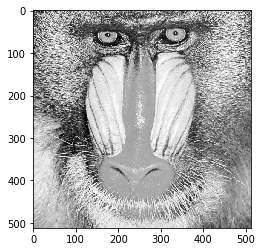

In [189]:
# L*a*b Model
def get_lab_channel(im):
    im_lab0 = (rgb2lab(im) + [0, 128, 128]) / [100, 255, 255]
    ##########################
    im_lab1 = rgb2lab(im) / 100.0
    im_l = im_lab1[:,:,0]
    ##########################
    im_lab2 = rgb2lab(im)
    im_lab2[:,:,1] = 0
    im_a = lab2rgb(im_lab2)
    ##########################
    im_lab3 = rgb2lab(im)
    im_lab3[:,:,2] = 0
    im_b = lab2rgb(im_lab3)
    ##########################
    return im_lab0, im_l, im_a, im_b

im1_lab, im1_l, im1_a, im1_b = get_lab_channel(im1)
res1_lab = hstack((im1_lab, im1_a))
res1_lab = hstack((res1_lab, im1_b))
plt.figure()
plt.imshow(res1_lab)

im2_lab, im2_l, im2_a, im2_b = get_lab_channel(im2)
res2_lab = hstack((im2_lab, im2_a))
res2_lab = hstack((res2_lab, im2_b))
plt.figure()
plt.imshow(res2_lab)

im3_lab, im3_l, im3_a, im3_b = get_lab_channel(im3)
res3_lab = hstack((im3_lab, im3_a))
res3_lab = hstack((res3_lab, im3_b))
plt.figure()
plt.imshow(res3_lab)

plt.figure()
plt.imshow(im1_l, cmap="gray")
plt.figure()
plt.imshow(im2_l, cmap="gray")
plt.figure()
plt.imshow(im3_l, cmap="gray")

### Part 2: Safe RGB Color Representation

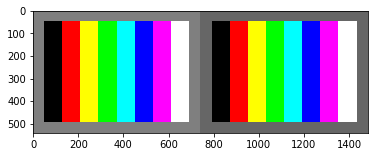

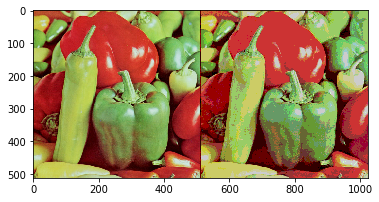

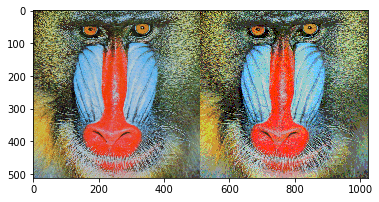

In [190]:
def safe_rgb_colors(im):
    #safe RGB color values: 0, 51, 102, 153, 204, 255
    for row in range(im.shape[0]):
        for col in range(im.shape[1]):
            for chan in range(im.shape[2]):
                if im[row,col,chan]<= 25:
                    im[row,col,chan] = 0
                elif im[row,col,chan] <= 76:
                    im[row,col,chan] = 51
                elif im[row,col,chan] <= 127:
                    im[row,col,chan] = 102
                elif im[row,col,chan] <= 178:
                    im[row,col,chan] = 153
                elif im[row,col,chan] <= 229:
                    im[row,col,chan] = 204
                else:
                    im[row,col,chan] = 255
    return im

im1_copy = copy(im1)
im2_copy = copy(im2)
im3_copy = copy(im3)

plt.figure()
plt.imshow(hstack((im1, safe_rgb_colors(im1_copy))))
plt.figure()
plt.imshow(hstack((im2, safe_rgb_colors(im2_copy))))
plt.figure()
plt.imshow(hstack((im3, safe_rgb_colors(im3_copy))))

### Part 3: Histogram Equalization : RGB and HSI models per channel

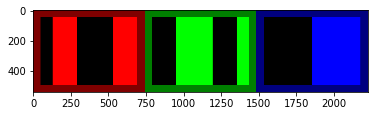

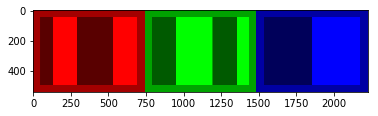

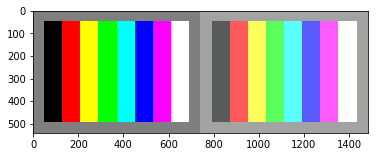

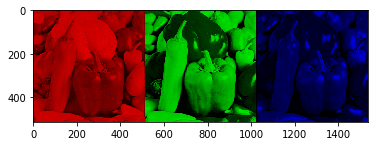

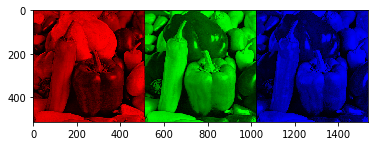

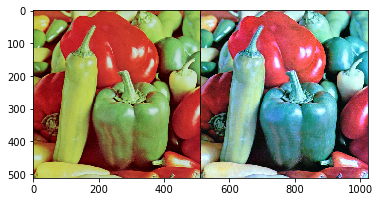

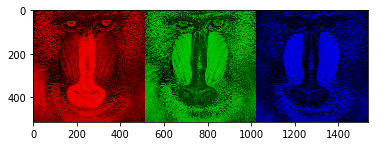

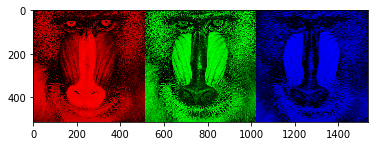

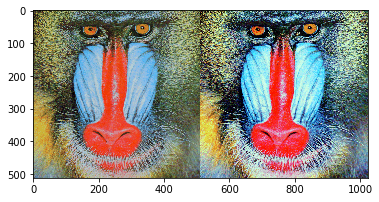

In [201]:
# RGB Model: Histogram Equalization
def histogramEqualization(im):
    if len(im.shape) != 2:
        im = im[:,:,0]
    freqs = [0 for _ in range(256)]
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            freqs[im[i, j]] += 1
    total_pixels = sum(freqs)
    histogram = [(freq * 1.)/total_pixels for freq in freqs]
    cumul_p = [sum(histogram[:(i + 1)]) for i in range(len(histogram))]
    im_new = np.zeros(im.shape, dtype=np.uint8)
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            im_new[i, j] = int(math.floor(255.0 * cumul_p[im[i, j]]))
    return im_new

###################################################

im1_r_eq, im1_g_eq, im1_b_eq = get_channel(im1)
im1_rgb = hstack((im1_r_eq, im1_g_eq))
im1_rgb = hstack((im1_rgb, im1_b_eq))
plt.figure()
plt.imshow(im1_rgb)

im1_r_eq[:,:,0] = histogramEqualization(im1[:,:,0])
im1_g_eq[:,:,1] = histogramEqualization(im1[:,:,1])
im1_b_eq[:,:,2] = histogramEqualization(im1[:,:,2])

im1_rgb_eq = hstack((im1_r_eq, im1_g_eq))
im1_rgb_eq = hstack((im1_rgb_eq, im1_b_eq))
plt.figure()
plt.imshow(im1_rgb_eq)

im1_eq = copy(im1)
im1_eq[:,:,0] = im1_r_eq[:,:,0]
im1_eq[:,:,1] = im1_g_eq[:,:,1]
im1_eq[:,:,2] = im1_b_eq[:,:,2]
plt.figure()
plt.imshow(hstack((im1,im1_eq)))

###################################################

im2_r_eq, im2_g_eq, im2_b_eq = get_channel(im2)
im2_rgb = hstack((im2_r_eq, im2_g_eq))
im2_rgb = hstack((im2_rgb, im2_b_eq))
plt.figure()
plt.imshow(im2_rgb)

im2_r_eq[:,:,0] = histogramEqualization(im2[:,:,0])
im2_g_eq[:,:,1] = histogramEqualization(im2[:,:,1])
im2_b_eq[:,:,2] = histogramEqualization(im2[:,:,2])

im2_rgb_eq = hstack((im2_r_eq, im2_g_eq))
im2_rgb_eq = hstack((im2_rgb_eq, im2_b_eq))
plt.figure()
plt.imshow(im2_rgb_eq)

im2_eq = copy(im2)
im2_eq[:,:,0] = im2_r_eq[:,:,0]
im2_eq[:,:,1] = im2_g_eq[:,:,1]
im2_eq[:,:,2] = im2_b_eq[:,:,2]
plt.figure()
plt.imshow(hstack((im2,im2_eq)))

###################################################

im3_r_eq, im3_g_eq, im3_b_eq = get_channel(im3)
im3_rgb = hstack((im3_r_eq, im3_g_eq))
im3_rgb = hstack((im3_rgb, im3_b_eq))
plt.figure()
plt.imshow(im3_rgb)

im3_r_eq[:,:,0] = histogramEqualization(im3[:,:,0])
im3_g_eq[:,:,1] = histogramEqualization(im3[:,:,1])
im3_b_eq[:,:,2] = histogramEqualization(im3[:,:,2])

im3_rgb_eq = hstack((im3_r_eq, im3_g_eq))
im3_rgb_eq = hstack((im3_rgb_eq, im3_b_eq))
plt.figure()
plt.imshow(im3_rgb_eq)

im3_eq = copy(im3)
im3_eq[:,:,0] = im3_r_eq[:,:,0]
im3_eq[:,:,1] = im3_g_eq[:,:,1]
im3_eq[:,:,2] = im3_b_eq[:,:,2]
plt.figure()
plt.imshow(hstack((im3,im3_eq)))

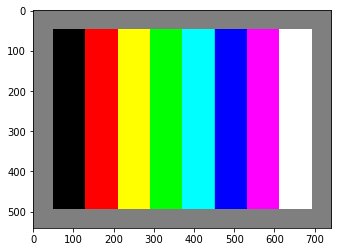

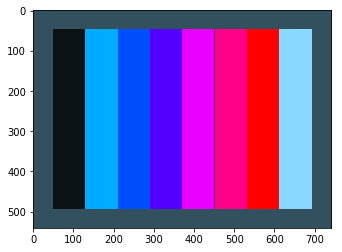

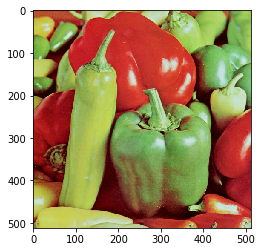

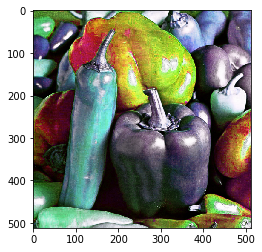

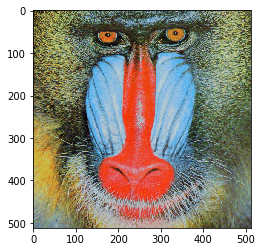

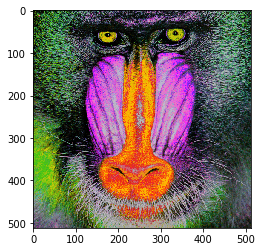

In [206]:
#HSI Model: Histogram Equalization
im1_hsv = rgb2hsv(im1)
for channel in range(im1_hsv.shape[2]):  
    im1_hsv[:, :, channel] = exposure.equalize_hist(im1_hsv[:, :, channel])
im1_hsv = hsv2rgb(im1_hsv)
plt.figure()
plt.imshow(im1)
plt.figure()
plt.imshow(im1_hsv)

im2_hsv = rgb2hsv(im2)
for channel in range(im2_hsv.shape[2]):  
    im2_hsv[:, :, channel] = exposure.equalize_hist(im2_hsv[:, :, channel])
im2_hsv = hsv2rgb(im2_hsv)
plt.figure()
plt.imshow(im2)
plt.figure()
plt.imshow(im2_hsv)

im3_hsv = rgb2hsv(im3)
for channel in range(im3_hsv.shape[2]):  
    im3_hsv[:, :, channel] = exposure.equalize_hist(im3_hsv[:, :, channel])
im3_hsv = hsv2rgb(im3_hsv)
plt.figure()
plt.imshow(im3)
plt.figure()
plt.imshow(im3_hsv)

### Part 4: HSI experiments

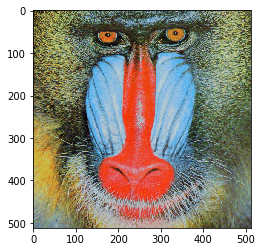

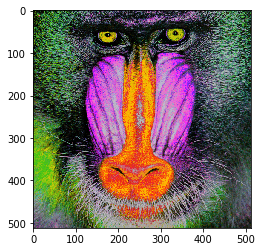

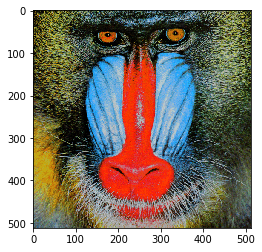

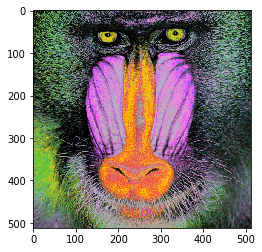

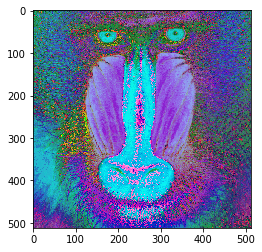

In [212]:
im3_hsv = rgb2hsv(im3)
plt.figure()
plt.imshow(im3)

im3_hsv_back = copy(im3_hsv)
for channel in range(3):  
    im3_hsv_back[:, :, channel] = exposure.equalize_hist(im3_hsv[:, :, channel])
im3_hsv_back = hsv2rgb(im3_hsv_back)
plt.figure()
plt.imshow(im3_hsv_back)

res1 = copy(im3_hsv)
for channel in range(1,3):  
    res1[:, :, channel] = exposure.equalize_hist(im3_hsv[:, :, channel])
res1 = hsv2rgb(res1)
plt.figure()
plt.imshow(res1)

res2 = copy(im3_hsv)
l = [0, 2]
for channel in l:  
    res2[:, :, channel] = exposure.equalize_hist(im3_hsv[:, :, channel])
res2 = hsv2rgb(res2)
plt.figure()
plt.imshow(res2)

res3 = copy(im3_hsv)
for channel in range(2,3):  
    res1[:, :, channel] = exposure.equalize_hist(im3_hsv[:, :, channel])
res1 = hsv2rgb(res3)
plt.figure()
plt.imshow(res3)

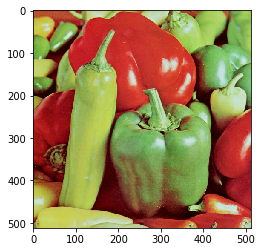

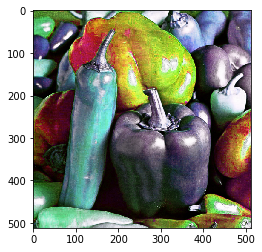

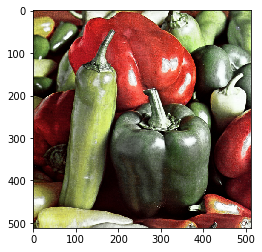

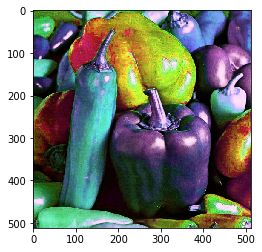

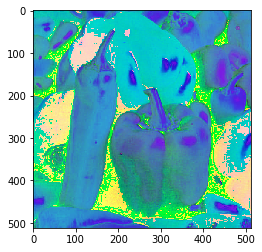

In [213]:
im3_hsv = rgb2hsv(im2)
plt.figure()
plt.imshow(im2)

im3_hsv_back = copy(im3_hsv)
for channel in range(3):  
    im3_hsv_back[:, :, channel] = exposure.equalize_hist(im3_hsv[:, :, channel])
im3_hsv_back = hsv2rgb(im3_hsv_back)
plt.figure()
plt.imshow(im3_hsv_back)

res1 = copy(im3_hsv)
for channel in range(1,3):  
    res1[:, :, channel] = exposure.equalize_hist(im3_hsv[:, :, channel])
res1 = hsv2rgb(res1)
plt.figure()
plt.imshow(res1)

res2 = copy(im3_hsv)
l = [0, 2]
for channel in l:  
    res2[:, :, channel] = exposure.equalize_hist(im3_hsv[:, :, channel])
res2 = hsv2rgb(res2)
plt.figure()
plt.imshow(res2)

res3 = copy(im3_hsv)
for channel in range(2,3):  
    res1[:, :, channel] = exposure.equalize_hist(im3_hsv[:, :, channel])
res1 = hsv2rgb(res3)
plt.figure()
plt.imshow(res3)

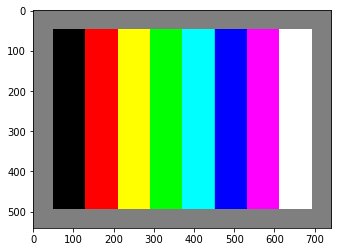

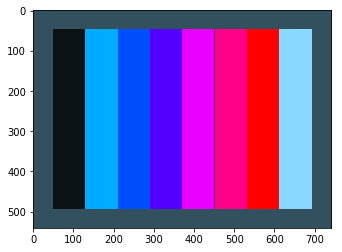

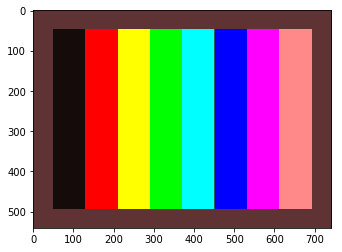

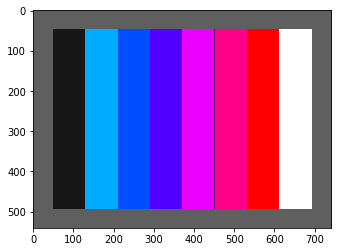

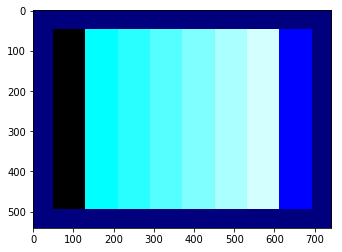

In [214]:
im3_hsv = rgb2hsv(im1)
plt.figure()
plt.imshow(im1)

im3_hsv_back = copy(im3_hsv)
for channel in range(3):  
    im3_hsv_back[:, :, channel] = exposure.equalize_hist(im3_hsv[:, :, channel])
im3_hsv_back = hsv2rgb(im3_hsv_back)
plt.figure()
plt.imshow(im3_hsv_back)

res1 = copy(im3_hsv)
for channel in range(1,3):  
    res1[:, :, channel] = exposure.equalize_hist(im3_hsv[:, :, channel])
res1 = hsv2rgb(res1)
plt.figure()
plt.imshow(res1)

res2 = copy(im3_hsv)
l = [0, 2]
for channel in l:  
    res2[:, :, channel] = exposure.equalize_hist(im3_hsv[:, :, channel])
res2 = hsv2rgb(res2)
plt.figure()
plt.imshow(res2)

res3 = copy(im3_hsv)
for channel in range(2,3):  
    res1[:, :, channel] = exposure.equalize_hist(im3_hsv[:, :, channel])
res1 = hsv2rgb(res3)
plt.figure()
plt.imshow(res3)